In [15]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries installed!


In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from pandas.io.json import json_normalize
import json

import requests

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('Libraries imported!')

Libraries imported!


In [17]:
import urllib.request # open and read URLs

import json # handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests # handle requests
import pandas as pd # process data as dataframes with Pandas
import numpy as np # handle data in a vectorized manner with NumPy

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed the GeoPy geocoding library yet
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed the Folium library yet
import folium # map rendering library

# Matplolib plotting library and associated modules
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # for K-Means clustering with Scikit-Learn

print("Libraries imported!")

Libraries imported!


In [18]:
# Get data about Paris geography from https://opendata.paris.fr website

with urllib.request.urlopen("https://opendata.paris.fr/explore/dataset/arrondissements/download?format=json&timezone=Europe/Berlin&use_labels_for_header=true") as url:
   data = json.loads(url.read())
data[0]

{'datasetid': 'arrondissements',
 'recordid': 'd2595383696899c7110e2e0361bb597c3e0ac2f3',
 'fields': {'n_sq_co': 750001537,
  'perimetre': 6239.19539614,
  'l_ar': '5ème Ardt',
  'longueur': 6238.8234077,
  'surface': 2539374.62284532,
  'geom_x_y': [48.8444431505, 2.35071460958],
  'geom': {'type': 'Polygon',
   'coordinates': [[[2.364433128355796, 48.84614003688701],
     [2.364836413709806, 48.84584371301591],
     [2.366029183892614, 48.84493028592922],
     [2.36515076812726, 48.8444324054548],
     [2.365095887443426, 48.84439550756652],
     [2.36504473107739, 48.84435635403799],
     [2.365032725481695, 48.84434637127702],
     [2.364954459873336, 48.84427190164975],
     [2.364945618729382, 48.84426221807595],
     [2.364918949269239, 48.844227596838365],
     [2.364896083371352, 48.84419181672511],
     [2.364884256202597, 48.84416988150041],
     [2.364861424317057, 48.844123264270046],
     [2.364850763166392, 48.84409588331012],
     [2.36484547429796, 48.84408229287991],


In [19]:
# Tranform the json data into a Pandas dataframe

par_nei = json_normalize(data)
par_nei.head()

,datasetid,recordid,record_timestamp,fields.n_sq_co,fields.perimetre,fields.l_ar,fields.longueur,fields.surface,fields.geom_x_y,fields.geom.type,fields.geom.coordinates,fields.objectid,fields.n_sq_ar,fields.l_aroff,fields.c_arinsee,fields.c_ar,geometry.type,geometry.coordinates
0,arrondissements,d2595383696899c7110e2e0361bb597c3e0ac2f3,2020-02-03T10:00:41.323+01:00,750001537,6239.195396,5ème Ardt,6238.823408,2.539375e+06,"[48.8444431505, 2.35071460958]",Polygon,"[[[2.364433128355796, 48.84614003688701], [2.3...",5,750000005,Panthéon,75105,5,Point,"[2.35071460958, 48.8444431505]"
1,arrondissements,dd5ab9d58b05037acb5459451ca3d1e09adfb292,2020-02-03T10:00:41.323+01:00,750001537,6483.686786,6ème Ardt,6483.324560,2.153096e+06,"[48.8491303586, 2.33289799905]",Polygon,"[[[2.344592677496354, 48.85404922924987], [2.3...",6,750000006,Luxembourg,75106,6,Point,"[2.33289799905, 48.8491303586]"
2,arrondissements,46938b6726a5ef79a86f4f4cbd3af143b4ebc653,2020-02-03T10:00:41.323+01:00,750001537,24089.666298,12ème Ardt,24088.038922,1.631478e+07,"[48.8349743815, 2.42132490078]",Polygon,"[[[2.413879624300607, 48.83357143972267], [2.4...",12,750000012,Reuilly,75112,12,Point,"[2.42132490078, 48.8349743815]"
3,arrondissements,74b99c18b53b5e6156c1ab20da177576162cd983,2020-02-03T10:00:41.323+01:00,750001537,6739.375055,10ème Ardt,6739.168359,2.891739e+06,"[48.8761300365, 2.36072848785]",Polygon,"[[[2.364685889119478, 48.88436904340793], [2.3...",10,750000010,Entrepôt,75110,10,Point,"[2.36072848785, 48.8761300365]"
4,arrondissements,00151c66bdca05738744d4dae4170d05a4908e73,2020-02-03T10:00:41.323+01:00,750001537,17416.109657,16ème Ardt,17415.326726,1.637254e+07,"[48.8603921054, 2.26197078836]",Polygon,"[[[2.274268195957375, 48.878365393142765], [2....",16,750000016,Passy,75116,16,Point,"[2.26197078836, 48.8603921054]"


In [20]:
# Format the dataframe

df_temp1 = par_nei[["fields.c_ar","fields.l_aroff","fields.geom_x_y"]]
df_temp2 = pd.DataFrame(par_nei['fields.geom_x_y'].tolist(), columns=["Latitude", "Longitude"])
df_drop = df_temp1.drop(["fields.geom_x_y"], axis = 1)
df_temp = pd.concat([df_drop,df_temp2], axis=1)
df_temp.columns = ["Arrondissement", "Neighborhood", "Latitude", "Longitude"]
paris_data = df_temp.sort_values(["Arrondissement"]).reset_index(drop=True)

# change neighborhood name Élysée to Elysée
paris_data.loc[paris_data.Neighborhood == "Élysée", ["Neighborhood"]] = "Elysée"

paris_data

,Arrondissement,Neighborhood,Latitude,Longitude
0,1,Louvre,48.862563,2.336443
1,2,Bourse,48.868279,2.342803
2,3,Temple,48.862872,2.360001
3,4,Hôtel-de-Ville,48.854341,2.357630
4,5,Panthéon,48.844443,2.350715
5,6,Luxembourg,48.849130,2.332898
6,7,Palais-Bourbon,48.856174,2.312188
7,8,Elysée,48.872721,2.312554
8,9,Opéra,48.877164,2.337458
9,10,Entrepôt,48.876130,2.360728


In [21]:
# Use GeoPy library to get the latitude and longitude values of Paris

address = "Paris, FR"

geolocator = Nominatim(user_agent="my-application")
location_par = geolocator.geocode(address)
latitude_par = location_par.latitude
longitude_par = location_par.longitude

print("The geograpical coordinates of Paris are {}, {}.".format(latitude_par, longitude_par))

The geograpical coordinates of Paris are 48.8566969, 2.3514616.


In [22]:
# Create a leaflet map of Paris with arrondissements superimposed on top

# create a map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# add markers to the map
for lat, lng, arrondissement, neighborhood in zip(paris_data["Latitude"], paris_data["Longitude"], paris_data["Arrondissement"], paris_data["Neighborhood"]):
    label = "{}, {}".format(arrondissement,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "blue",
        fill = True,
        fill_color = "#3186cc",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_paris)  
    
map_paris

In [23]:
# Get data about New York geography from https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json

with urllib.request.urlopen("https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json") as file:
   newyork_data = json.loads(file.read())
#newyork_data

In [24]:
# Tranform the json data into a formatted Pandas dataframe

# all the relevant data is in the features key, which is basically a list of the neighborhoods
neighborhoods_data = newyork_data["features"]

# define the dataframe columns
column_names = ["Borough", "Neighborhood", "Latitude", "Longitude"] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# loop through the data and fill the dataframe one row at a time
for data in neighborhoods_data:
    borough = neighborhood_name = data["properties"]["borough"] 
    neighborhood_name = data["properties"]["name"]
        
    neighborhood_latlon = data["geometry"]["coordinates"]
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({"Borough": borough,
                                          "Neighborhood": neighborhood_name,
                                          "Latitude": neighborhood_lat,
                                          "Longitude": neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [25]:
manhattan_data = neighborhoods[neighborhoods["Borough"] == "Manhattan"].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [26]:
address = "Manhattan, NY"

geolocator = Nominatim(user_agent="my-application")
location_man = geolocator.geocode(address)
latitude_man = location_man.latitude
longitude_man = location_man.longitude

print("The geograpical coordinates of Manhattan are {}, {}.".format(latitude_man, longitude_man))

The geograpical coordinates of Manhattan are 40.7896239, -73.9598939.


In [27]:
# Create a leaflet map of Manhattan with neighborhoods superimposed on top

# create a map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# add markers to the map
for lat, lng, neighborhood in zip(manhattan_data["Latitude"], manhattan_data["Longitude"], manhattan_data["Neighborhood"]):
    label = "{}".format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "red",
        fill = True,
        fill_color = "#E03450",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_manhattan)  
    
map_manhattan

In [28]:
CLIENT_ID = "MF4VNN5LCLCUG1F01NH2JR2SJ0ILYOGLVCDHD2KGNXIBTT1U" 
CLIENT_SECRET = "GQ04P00OKBMLX0EUM0FGO5JOMA44JFSAEUOTFYGZY35XOSSC" 
VERSION = "20180605"

In [29]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_paris(arrondissements, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for arrondissement, name, lat, lng in zip(arrondissements, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            arrondissement,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
               v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Arrondissement",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [30]:
# Create a new dataframe called paris_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

paris_venues = getNearbyVenues_paris(arrondissements=paris_data["Arrondissement"],
                               names = paris_data["Neighborhood"],
                               latitudes = paris_data["Latitude"],
                               longitudes = paris_data["Longitude"]
                               )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Elysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Buttes-Montmartre
Buttes-Chaumont
Ménilmontant


In [31]:
print(paris_venues.shape)
print("There are {} unique categories.".format(len(paris_venues["Venue Category"].unique())))
paris_venues.head()


(1825, 8)
There are 229 unique categories.


,Arrondissement,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Louvre,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,1,Louvre,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,1,Louvre,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,1,Louvre,48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,1,Louvre,48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


In [32]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_manhattan(boroughs, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
            v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Borough",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [33]:
# Create a new dataframe called manhattan_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

manhattan_venues = getNearbyVenues_manhattan(boroughs=manhattan_data["Borough"],
                               names = manhattan_data["Neighborhood"],
                               latitudes = manhattan_data["Latitude"],
                               longitudes = manhattan_data["Longitude"]
                               )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [34]:
print(manhattan_venues.shape)
print("There are {} unique categories.".format(len(manhattan_venues["Venue Category"].unique())))
manhattan_venues.head()

(3853, 8)
There are 336 unique categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Manhattan,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Manhattan,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Manhattan,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Manhattan,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [35]:
paris_onehot = pd.get_dummies(paris_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
paris_onehot["Arrondissement"] = paris_venues["Arrondissement"] 
paris_onehot["Neighborhood"] = paris_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [paris_onehot.columns[-2], paris_onehot.columns[-1]] + list(paris_onehot.columns[:-2])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Arrondissement,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Drive-in Theater,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Non-Profit,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,Louvre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [36]:
# Group by neighborhood and by the mean of frequency for each category

paris_grouped = paris_onehot.groupby("Neighborhood").mean().reset_index()
paris_grouped.head()

,Neighborhood,Arrondissement,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Drive-in Theater,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Non-Profit,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Batignolles-Monceau,17,0.0,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.06,0.0,0.03,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.03,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,0.00,0.00,0.01,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.01,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.11,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.01,0.00,0.0,0.01,0.00,0.00,0.0,0.00,0.0,0.12,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.13,0.06,0.00,0.0,0.0,0.0,0.00,0.0,0.01,0.01,0.01,0.00,0.0,0.0,0.01,0.0,0.0,0.00,

In [37]:
# Top 5 most common categories of venues for each neighborhood 

num_top_venues = 5

for hood in paris_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[2:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values("freq", ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Batignolles-Monceau----
                 venue  freq
0   Italian Restaurant  0.13
1                Hotel  0.12
2    French Restaurant  0.11
3  Japanese Restaurant  0.06
4               Bakery  0.06


----Bourse----
                venue  freq
0   French Restaurant  0.11
1               Hotel  0.06
2            Wine Bar  0.06
3        Cocktail Bar  0.05
4  Italian Restaurant  0.04


----Buttes-Chaumont----
               venue  freq
0                Bar  0.12
1  French Restaurant  0.07
2              Hotel  0.05
3        Supermarket  0.05
4               Café  0.05


----Buttes-Montmartre----
               venue  freq
0  French Restaurant  0.15
1                Bar  0.14
2        Pizza Place  0.05
3             Bistro  0.05
4               Café  0.04


----Elysée----
               venue  freq
0  French Restaurant  0.17
1              Hotel  0.15
2     Cosmetics Shop  0.03
3             Bakery  0.03
4            Theater  0.03


----Entrepôt----
               venue  freq
0        C

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
# Create a new dataframe and display the top 5 venues for each neighborhood

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Arrondissement", "Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
paris_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
paris_neighborhoods_venues_sorted[[ "Arrondissement","Neighborhood"]] = paris_grouped[["Arrondissement","Neighborhood"]]

for ind in np.arange(paris_grouped.shape[0]):
    paris_neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(paris_grouped.iloc[ind, 1:], num_top_venues)

paris_neighborhoods_venues_sorted

,Arrondissement,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17,Batignolles-Monceau,Italian Restaurant,Hotel,French Restaurant,Bakery,Japanese Restaurant,Plaza,Café,Bistro,Supermarket,Restaurant
1,2,Bourse,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bistro,Italian Restaurant,Creperie,Bakery,Theater,Salad Place
2,19,Buttes-Chaumont,Bar,French Restaurant,Café,Supermarket,Hotel,Bistro,Pizza Place,Italian Restaurant,Seafood Restaurant,Beer Bar
3,18,Buttes-Montmartre,French Restaurant,Bar,Bistro,Pizza Place,Café,Italian Restaurant,Coffee Shop,Park,Hotel,Restaurant
4,8,Elysée,French Restaurant,Hotel,Cosmetics Shop,Clothing Store,Bakery,Theater,Garden,Spa,Italian Restaurant,Shoe Store
5,10,Entrepôt,Coffee Shop,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Bistro,Cocktail Bar,Pizza Place,Seafood Restaurant
6,13,Gobelins,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Hotel,Japanese Restaurant,Bakery,Cambodian Restaurant,Juice Bar
7,4,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Plaza,Pastry Shop,Bakery,Wine Bar,Italian Restaurant,Cocktail Bar,Hotel,Garden
8,1,Louvre,French Restaurant,Japanese Restaurant,Plaza,Hotel,Café,Historic Site,Coffee Shop,Korean Restaurant,Udon Restaurant,Art Museum
9,6,Luxembourg,French Restaurant,Italian Restaurant,Bakery,Pastry Shop,Chocolate Shop,Plaza,Bookstore,Seafood Restaurant,Ice Cream Shop,Wine Bar


In [40]:
# one hot encoding

manhattan_onehot = pd.get_dummies(manhattan_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
manhattan_onehot["Neighborhood"] = manhattan_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Sto

In [41]:
# Group by neighborhood and by the mean of frequency for each category

manhattan_grouped = manhattan_onehot.groupby("Neighborhood").mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Sto

In [42]:
num_top_venues = 5

for hood in manhattan_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[1:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Battery Park City----
           venue  freq
0    Coffee Shop  0.09
1           Park  0.08
2          Hotel  0.04
3  Memorial Site  0.03
4          Plaza  0.03


----Carnegie Hill----
         venue  freq
0  Pizza Place  0.05
1  Coffee Shop  0.05
2       Bakery  0.05
3          Gym  0.04
4         Café  0.04


----Central Harlem----
                venue  freq
0  African Restaurant  0.03
1       Grocery Store  0.03
2         Coffee Shop  0.03
3                 Gym  0.03
4      Cosmetics Shop  0.03


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1              Bakery  0.05
2      Ice Cream Shop  0.04
3         Art Gallery  0.04
4  Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.06
1       Ice Cream Shop  0.05
2         Cocktail Bar  0.04
3         Optical Shop  0.04
4  American Restaurant  0.04


----Civic Center----
               venue  freq
0        Coffee Shop  0.06
1              Hotel  0.06
2  French

In [43]:
num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted[["Neighborhood"]] = manhattan_grouped[["Neighborhood"]]

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Park,Hotel,Plaza,Memorial Site,Gym,Grocery Store,Gourmet Shop,Burger Joint,Shopping Mall
1,Carnegie Hill,Pizza Place,Bakery,Coffee Shop,Café,Gym,Bookstore,Cocktail Bar,Gym / Fitness Center,Art Museum,Indian Restaurant
2,Central Harlem,Bar,Cosmetics Shop,Gym,Coffee Shop,Tapas Restaurant,Grocery Store,African Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,American Restaurant
3,Chelsea,Coffee Shop,Bakery,Art Gallery,Ice Cream Shop,American Restaurant,Italian Restaurant,Theater,French Restaurant,Cocktail Bar,Pet Store
4,Chinatown,Chinese Restaurant,Ice Cream Shop,Cocktail Bar,Optical Shop,American Restaurant,Sandwich Place,Coffee Shop,Hotpot Restaurant,Bakery,Dumpling Restaurant
5,Civic Center,Hotel,Coffee Shop,Spa,French Restaurant,American Restaurant,Cocktail Bar,Yoga Studio,Wine Bar,Park,Café
6,Clinton,Italian Restaurant,Theater,Gym / Fitness Center,Hotel,Coffee Shop,American Restaurant,Wine Shop,Cocktail Bar,Gym,Bakery
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Pizza Place,Café,Fountain,Chinese Restaurant,Art Museum
8,East Village,Pizza Place,Coffee Shop,Cocktail Bar,Ice Cream Shop,Seafood Restaurant,Japanese Restaurant,Wine Bar,Bar,Juice Bar,Dessert Shop
9,Financial District,Coffee Shop,Hotel,American Restaurant,Pizza Place,Gym,Gym / Fitness Center,Steakhouse,Wine Shop,Food Truck,Park


In [44]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood", "Arrondissement"]
paris_grouped_clustering = paris_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(paris_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

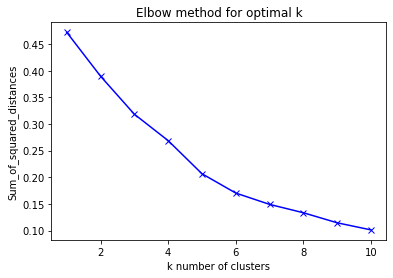

In [45]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()


In [46]:
# Cluster the venues of Paris into 5 clusters

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 1, 3, 1, 4, 1, 1, 1], dtype=int32)

In [47]:
paris_merged = paris_data
 
# add clustering labels
paris_merged["Cluster Labels"] = kmeans.labels_
paris_merged = pd.merge(paris_merged, paris_neighborhoods_venues_sorted,  how = "left", left_on = ["Arrondissement","Neighborhood"], right_on = ["Arrondissement","Neighborhood"])

paris_merged


,Arrondissement,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Louvre,48.862563,2.336443,3,French Restaurant,Japanese Restaurant,Plaza,Hotel,Café,Historic Site,Coffee Shop,Korean Restaurant,Udon Restaurant,Art Museum
1,2,Bourse,48.868279,2.342803,1,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bistro,Italian Restaurant,Creperie,Bakery,Theater,Salad Place
2,3,Temple,48.862872,2.360001,1,French Restaurant,Coffee Shop,Bistro,Burger Joint,Bakery,Moroccan Restaurant,Wine Bar,Vietnamese Restaurant,Café,Gourmet Shop
3,4,Hôtel-de-Ville,48.854341,2.357630,1,French Restaurant,Ice Cream Shop,Plaza,Pastry Shop,Bakery,Wine Bar,Italian Restaurant,Cocktail Bar,Hotel,Garden
4,5,Panthéon,48.844443,2.350715,3,French Restaurant,Bakery,Café,Hotel,Coffee Shop,Italian Restaurant,Museum,Pub,Plaza,Wine Bar
5,6,Luxembourg,48.849130,2.332898,1,French Restaurant,Italian Restaurant,Bakery,Pastry Shop,Chocolate Shop,Plaza,Bookstore,Seafood Restaurant,Ice Cream Shop,Wine Bar
6,7,Palais-Bourbon,48.856174,2.312188,4,French Restaurant,Hotel,Plaza,Historic Site,Café,Coffee Shop,Cocktail Bar,History Museum,Italian Restaurant,Dessert Shop
7,8,Elysée,48.872721,2.312554,1,French Restaurant,Hotel,Cosmetics Shop,Clothing Store,Bakery,Theater,Garden,Spa,Italian Restaurant,Shoe Store
8,9,Opéra,48.877164,2.337458,1,French Restaurant,Hotel,Cocktail Bar,Bistro,Italian Restaurant,Wine Bar,Pizza Place,Cheese Shop,Café,Vegetarian / Vegan Restaurant
9,10,Entrepôt,48.876130,2.360728,1,Coffee Shop,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Bistro,Cocktail Bar,Pizza Place,Seafood Restaurant


In [48]:
# create map
map_clusters = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged["Latitude"], paris_merged["Longitude"], paris_merged["Neighborhood"], paris_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [49]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood"]
manhattan_grouped_clustering = manhattan_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(manhattan_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)


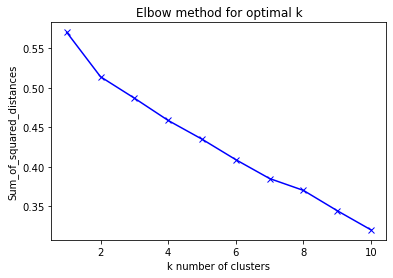

In [50]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()

In [51]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 3, 1, 7, 3, 1, 6, 7, 2], dtype=int32)

In [52]:
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged["Cluster Labels"] = kmeans.labels_

# merge manhattan_grouped with manhattann_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_venues_sorted.set_index("Neighborhood"), on="Neighborhood")

manhattan_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Pizza Place,Donut Shop,Sandwich Place,Spanish Restaurant,Mexican Restaurant,Athletics & Sports,Deli / Bodega,Coffee Shop,Bus Station,Supermarket
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,Ice Cream Shop,Cocktail Bar,Optical Shop,American Restaurant,Sandwich Place,Coffee Shop,Hotpot Restaurant,Bakery,Dumpling Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Bakery,Café,Grocery Store,Mexican Restaurant,Latin American Restaurant,Pizza Place,Spanish Restaurant,Tapas Restaurant,Park,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Latin American Restaurant,Spanish Restaurant,Wine Bar,Pizza Place,Restaurant,Lounge,Deli / Bodega,Café,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,7,Deli / Bodega,Chinese Restaurant,Coffee Shop,Park,Mexican Restaurant,Café,Bar,Sushi Restaurant,Sandwich Place,Pizza Place
5,Manhattan,Manhattanville,40.816934,-73.957385,3,Pizza Place,Chinese Restaurant,Park,Italian Restaurant,Coffee Shop,Mexican Restaurant,Café,Indian Restaurant,Seafood Restaurant,Supermarket
6,Manhattan,Central Harlem,40.815976,-73.943211,1,Bar,Cosmetics Shop,Gym,Coffee Shop,Tapas Restaurant,Grocery Store,African Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,American Restaurant
7,Manhattan,East Harlem,40.792249,-73.944182,6,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Pizza Place,Café,Fountain,Chinese Restaurant,Art Museum
8,Manhattan,Upper East Side,40.775639,-73.960508,7,Exhibit,Italian Restaurant,Art Gallery,Bakery,Coffee Shop,Gym / Fitness Center,Art Museum,French Restaurant,Yoga Studio,Hotel
9,Manhattan,Yorkville,40.775930,-73.947118,2,Italian Restaurant,Gym,Coffee Shop,Pizza Place,Japanese Restaurant,Deli / Bodega,Bar,Bagel Shop,Thai Restaurant,Ice Cream Shop


In [53]:
map_clusters = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged["Latitude"], manhattan_merged["Longitude"], manhattan_merged["Neighborhood"], manhattan_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [54]:
# Cluster 1

paris_merged.loc[paris_merged["Cluster Labels"] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Buttes-Montmartre,French Restaurant,Bar,Bistro,Pizza Place,Café,Italian Restaurant,Coffee Shop,Park,Hotel,Restaurant


In [55]:
# Cluster 2

paris_merged.loc[paris_merged["Cluster Labels"] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bourse,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bistro,Italian Restaurant,Creperie,Bakery,Theater,Salad Place
2,Temple,French Restaurant,Coffee Shop,Bistro,Burger Joint,Bakery,Moroccan Restaurant,Wine Bar,Vietnamese Restaurant,Café,Gourmet Shop
3,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Plaza,Pastry Shop,Bakery,Wine Bar,Italian Restaurant,Cocktail Bar,Hotel,Garden
5,Luxembourg,French Restaurant,Italian Restaurant,Bakery,Pastry Shop,Chocolate Shop,Plaza,Bookstore,Seafood Restaurant,Ice Cream Shop,Wine Bar
7,Elysée,French Restaurant,Hotel,Cosmetics Shop,Clothing Store,Bakery,Theater,Garden,Spa,Italian Restaurant,Shoe Store
8,Opéra,French Restaurant,Hotel,Cocktail Bar,Bistro,Italian Restaurant,Wine Bar,Pizza Place,Cheese Shop,Café,Vegetarian / Vegan Restaurant
9,Entrepôt,Coffee Shop,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Bistro,Cocktail Bar,Pizza Place,Seafood Restaurant
10,Popincourt,French Restaurant,Bar,Bistro,Coffee Shop,Pizza Place,Café,Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant
14,Vaugirard,French Restaurant,Hotel,Italian Restaurant,Coffee Shop,Park,Bistro,Lebanese Restaurant,Bakery,Japanese Restaurant,Persian Restaurant
16,Batignolles-Monceau,Italian Restaurant,Hotel,French Restaurant,Bakery,Japanese Restaurant,Plaza,Café,Bistro,Supermarket,Restaurant


In [56]:
# Cluster 3

paris_merged.loc[paris_merged["Cluster Labels"] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Passy,Plaza,French Restaurant,Pool,Garden,Lake,Boat or Ferry,Diner,Castle,Cafeteria,Basketball Court


In [57]:
# Cluster 4

paris_merged.loc[paris_merged["Cluster Labels"] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,French Restaurant,Japanese Restaurant,Plaza,Hotel,Café,Historic Site,Coffee Shop,Korean Restaurant,Udon Restaurant,Art Museum
4,Panthéon,French Restaurant,Bakery,Café,Hotel,Coffee Shop,Italian Restaurant,Museum,Pub,Plaza,Wine Bar
11,Reuilly,Lake,Zoo Exhibit,Bakery,French Restaurant,Supermarket,Bistro,Bus Stop,Park,Monument / Landmark,Japanese Restaurant
12,Gobelins,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Hotel,Japanese Restaurant,Bakery,Cambodian Restaurant,Juice Bar
13,Observatoire,French Restaurant,Hotel,Italian Restaurant,Bar,Bakery,Bistro,Plaza,Sushi Restaurant,Pizza Place,Supermarket
19,Ménilmontant,French Restaurant,Bar,Bakery,Plaza,Bistro,Japanese Restaurant,Italian Restaurant,Supermarket,Park,Café


In [58]:
# Cluster 5

paris_merged.loc[paris_merged["Cluster Labels"] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,French Restaurant,Hotel,Plaza,Historic Site,Café,Coffee Shop,Cocktail Bar,History Museum,Italian Restaurant,Dessert Shop


In [59]:
# Cluster 1

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Italian Restaurant,Plaza,Concert Hall,Theater,Gym / Fitness Center,French Restaurant,Café,Performing Arts Venue,Park,Indie Movie Theater
20,Lower East Side,Art Gallery,Coffee Shop,Mexican Restaurant,Pizza Place,Japanese Restaurant,Latin American Restaurant,Speakeasy,Italian Restaurant,Ramen Restaurant,Ice Cream Shop
21,Tribeca,American Restaurant,Cocktail Bar,Spa,Café,Hotel,Park,Italian Restaurant,French Restaurant,Coffee Shop,Greek Restaurant
25,Manhattan Valley,Coffee Shop,Park,Indian Restaurant,Chinese Restaurant,Café,Pizza Place,Wine Shop,Mexican Restaurant,Bar,Yoga Studio
39,Hudson Yards,Gym / Fitness Center,Hotel,Italian Restaurant,American Restaurant,Theater,Art Gallery,Coffee Shop,Indie Theater,Gym,Café


In [60]:
# Cluster 2

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Latin American Restaurant,Spanish Restaurant,Wine Bar,Pizza Place,Restaurant,Lounge,Deli / Bodega,Café,Bakery
6,Central Harlem,Bar,Cosmetics Shop,Gym,Coffee Shop,Tapas Restaurant,Grocery Store,African Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,American Restaurant
14,Clinton,Italian Restaurant,Theater,Gym / Fitness Center,Hotel,Coffee Shop,American Restaurant,Wine Shop,Cocktail Bar,Gym,Bakery
17,Chelsea,Coffee Shop,Bakery,Art Gallery,Ice Cream Shop,American Restaurant,Italian Restaurant,Theater,French Restaurant,Cocktail Bar,Pet Store
32,Civic Center,Hotel,Coffee Shop,Spa,French Restaurant,American Restaurant,Cocktail Bar,Yoga Studio,Wine Bar,Park,Café
35,Turtle Bay,Coffee Shop,Steakhouse,Sushi Restaurant,Park,Indian Restaurant,Ramen Restaurant,Wine Bar,French Restaurant,Greek Restaurant,Japanese Restaurant
38,Flatiron,Gym / Fitness Center,Yoga Studio,Italian Restaurant,American Restaurant,New American Restaurant,Wine Shop,Spa,Cosmetics Shop,Cycle Studio,Mexican Restaurant


In [61]:
# Cluster 3

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Pizza Place,Donut Shop,Sandwich Place,Spanish Restaurant,Mexican Restaurant,Athletics & Sports,Deli / Bodega,Coffee Shop,Bus Station,Supermarket
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Pizza Place,Japanese Restaurant,Deli / Bodega,Bar,Bagel Shop,Thai Restaurant,Ice Cream Shop
23,Soho,Clothing Store,Coffee Shop,Italian Restaurant,Shoe Store,French Restaurant,Boutique,Women's Store,Café,Bakery,Salon / Barbershop
24,West Village,Italian Restaurant,New American Restaurant,Jazz Club,Cosmetics Shop,Park,Coffee Shop,Cocktail Bar,American Restaurant,Bakery,Wine Bar
26,Morningside Heights,Park,Sandwich Place,Italian Restaurant,Chinese Restaurant,American Restaurant,Coffee Shop,Deli / Bodega,Playground,Mexican Restaurant,Bookstore
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,American Restaurant,Japanese Restaurant,Burger Joint,Gym / Fitness Center,Bakery,Dessert Shop,Coffee Shop
34,Sutton Place,Gym / Fitness Center,Gym,Furniture / Home Store,Italian Restaurant,Coffee Shop,American Restaurant,Salon / Barbershop,Vegetarian / Vegan Restaurant,Juice Bar,Grocery Store


In [62]:
# Cluster 4

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Ice Cream Shop,Cocktail Bar,Optical Shop,American Restaurant,Sandwich Place,Coffee Shop,Hotpot Restaurant,Bakery,Dumpling Restaurant
2,Washington Heights,Bakery,Café,Grocery Store,Mexican Restaurant,Latin American Restaurant,Pizza Place,Spanish Restaurant,Tapas Restaurant,Park,Coffee Shop
5,Manhattanville,Pizza Place,Chinese Restaurant,Park,Italian Restaurant,Coffee Shop,Mexican Restaurant,Café,Indian Restaurant,Seafood Restaurant,Supermarket
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Gym / Fitness Center,Cocktail Bar,Burger Joint,Bakery,Gym,Sushi Restaurant,Café
11,Roosevelt Island,Park,Baseball Field,Gym,Pizza Place,Plaza,Boat or Ferry,Deli / Bodega,Sushi Restaurant,Greek Restaurant,Sandwich Place
16,Murray Hill,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Gym,Hotel,American Restaurant,Sandwich Place,Pizza Place,Burger Joint,Gourmet Shop
30,Carnegie Hill,Pizza Place,Bakery,Coffee Shop,Café,Gym,Bookstore,Cocktail Bar,Gym / Fitness Center,Art Museum,Indian Restaurant
31,Noho,Italian Restaurant,Ice Cream Shop,Hotel,Cocktail Bar,Japanese Restaurant,Coffee Shop,Yoga Studio,Pizza Place,Southern / Soul Food Restaurant,Gift Shop
36,Tudor City,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Grocery Store,Pizza Place,Burger Joint,Seafood Restaurant,Thai Restaurant,Gourmet Shop,Steakhouse


In [63]:
manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Upper West Side,Italian Restaurant,Coffee Shop,Wine Bar,Café,American Restaurant,Mediterranean Restaurant,Bakery,Ice Cream Shop,Indian Restaurant,Gym
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Coffee Shop,Clothing Store,Café,Gym,Pizza Place,Indie Movie Theater,Ice Cream Shop,Mediterranean Restaurant
29,Financial District,Coffee Shop,Hotel,American Restaurant,Pizza Place,Gym,Gym / Fitness Center,Steakhouse,Wine Shop,Food Truck,Park


In [64]:
# Cluster 6

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Battery Park City,Coffee Shop,Park,Hotel,Plaza,Memorial Site,Gym,Grocery Store,Gourmet Shop,Burger Joint,Shopping Mall


In [65]:
manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 6, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Pizza Place,Café,Fountain,Chinese Restaurant,Art Museum
15,Midtown,Coffee Shop,Theater,Hotel,Plaza,Cuban Restaurant,Pizza Place,Sandwich Place,Sporting Goods Shop,Japanese Restaurant,Sushi Restaurant
22,Little Italy,Café,Italian Restaurant,Bakery,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Spa,Cosmetics Shop,Women's Store,Thai Restaurant
37,Stuyvesant Town,Bar,Cocktail Bar,Boat or Ferry,Wine Shop,Bagel Shop,Coffee Shop,Park,Playground,Thai Restaurant,Pizza Place


In [66]:
# Cluster 8

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 7, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Deli / Bodega,Chinese Restaurant,Coffee Shop,Park,Mexican Restaurant,Café,Bar,Sushi Restaurant,Sandwich Place,Pizza Place
8,Upper East Side,Exhibit,Italian Restaurant,Art Gallery,Bakery,Coffee Shop,Gym / Fitness Center,Art Museum,French Restaurant,Yoga Studio,Hotel
19,East Village,Pizza Place,Coffee Shop,Cocktail Bar,Ice Cream Shop,Seafood Restaurant,Japanese Restaurant,Wine Bar,Bar,Juice Bar,Dessert Shop
27,Gramercy,Coffee Shop,Restaurant,Indian Restaurant,Bar,Pizza Place,Bagel Shop,Mexican Restaurant,Mediterranean Restaurant,Café,Italian Restaurant
